In [27]:
import pandas as pd
import numpy as np
from math import sqrt

In [28]:
data = pd.read_csv('Initial_data.csv')
data = data.drop(columns = ['Unnamed: 9'])
data.head()

,M,CdX,Doping Site,∆H(Cd-rich),∆H(Te-rich),(+2/+1),(+1/0),(0/-1),(-1/-2),Period,...,Delta EN,Delta At. Num.,Delta Val.,# Cd Neighbors,# Te Neighbors,Corrected VBM (eV),Corrected CBM (eV),∆H(Cd-rich).1,∆H(Mod),∆H(Te-rich).1
0,S,CdTe,M_Cd,5.043,3.147,-1.556,0.433,0.433,1.081,3,...,0.89,-32,4,0,4,2.557,2.542,4.544,3.596,2.648
1,Br,CdTe,M_Cd,4.532,3.110,-0.816,0.617,0.933,1.579,4,...,1.27,-13,5,0,4,2.560,2.545,4.336,3.625,2.914
2,O,CdSe_0.5S_0.5,M_Se,0.742,1.380,-0.732,-0.405,1.277,1.820,2,...,0.89,26,4,4,0,0.178,0.793,1.145,1.141,1.783
3,O,CdTe_0.5Se_0.5,M_Se,0.995,1.589,-0.681,-0.366,0.969,1.433,2,...,0.89,26,4,4,0,0.786,1.011,1.439,1.610,2.034
4,Os,CdTe,M_Te,5.718,6.666,-0.676,-0.235,0.970,1.437,6,...,0.10,24,2,4,0,1.728,2.223,5.722,6.196,6.670


In [29]:
predictors = list(data.columns[3:9])
features = list(data.columns[9:27])
all_features = []
for feat in features:
    square_feat = feat + '_square' 
    data[square_feat] = data[feat] ** 2
    if data[feat].min() >= 0:
        sqrt_feat = feat + '_sqrt'
        data[sqrt_feat] = data[feat].apply(sqrt)
        all_features.extend([feat, square_feat, sqrt_feat])
    else:
        all_features.extend([feat, square_feat])

In [30]:
def standardize(v):
    """
    Takes a single column of a DataFrame and returns a new column 
    with the data standardized (mean 0, std deviation 1)
    """
    std = v.std()
    if std == 0:
        return np.zeros(len(v))
    else:
        return (v - v.mean()) / std

# Standardize each of the features
for feature in all_features:
    data[feature] = standardize(data[feature])
    
# Make the predictors have mean 0 
for predictor in predictors:
    mean_pre = data[predictor].mean() 
    data[predictor] -= mean_pre

# Preview
data.head()

,M,CdX,Doping Site,∆H(Cd-rich),∆H(Te-rich),(+2/+1),(+1/0),(0/-1),(-1/-2),Period,...,# Te Neighbors_square,# Te Neighbors_sqrt,Corrected VBM (eV)_square,Corrected VBM (eV)_sqrt,Corrected CBM (eV)_square,Corrected CBM (eV)_sqrt,∆H(Cd-rich).1_square,∆H(Cd-rich).1_sqrt,∆H(Mod)_square,∆H(Mod)_sqrt
0,S,CdTe,M_Cd,1.848614,-0.470445,-1.698014,-0.394115,-0.975473,-0.857633,-1.108704,...,1.008398,0.672706,-0.673641,-0.399537,-0.774966,-0.536864,0.732711,0.864289,-0.055435,0.278804
1,Br,CdTe,M_Cd,1.337614,-0.507445,-0.958014,-0.210115,-0.475473,-0.359633,-0.294888,...,1.008398,0.672706,-0.670493,-0.396207,-0.771660,-0.533180,0.559898,0.751924,-0.037694,0.295312
2,O,CdSe_0.5S_0.5,M_Se,-2.452386,-2.237445,-0.874014,-1.232115,-0.131473,-0.118633,-1.922519,...,-1.676451,-1.944474,-2.008097,-4.579015,-2.038645,-3.294268,-1.076498,-1.552456,-1.040668,-1.512643
3,O,CdTe_0.5Se_0.5,M_Se,-2.199386,-2.028445,-0.823014,-1.193115,-0.439473,-0.505633,-1.922519,...,-1.676451,-1.944474,-1.887889,-2.929232,-1.953444,-2.843831,-1.005419,-1.257570,-0.931361,-1.078523
4,Os,CdTe,M_Te,2.523614,3.048555,-0.818014,-1.062115,-0.438473,-0.501633,1.332742,...,-1.676451,-1.944474,-1.402189,-1.409745,-1.104276,-0.941908,1.864195,1.457092,2.101458,1.561305


In [43]:
X = data.iloc[:, 9:55]
y1 = data.iloc[:, 3]
y2 = data.iloc[:, 4]
y3 = data.iloc[:, 5]
y4 = data.iloc[:, 6]
y5 = data.iloc[:, 7]
y6 = data.iloc[:, 8]
y1 = y1.astype(int)
y2 = y2.astype(int)
y3 = y3.astype(int)
y4 = y4.astype(int)
y5 = y5.astype(int)
y6 = y6.astype(int)

C:\Users\xiang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


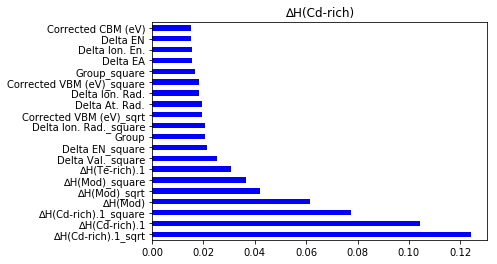

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
model = ExtraTreesClassifier()
model.fit(X,y1)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', color = 'b', title = predictors[0])
plt.show()

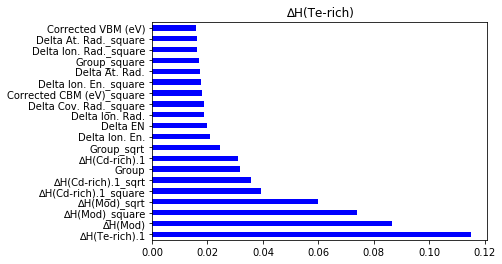

In [45]:
model.fit(X,y2)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', color = 'b', title = predictors[1])

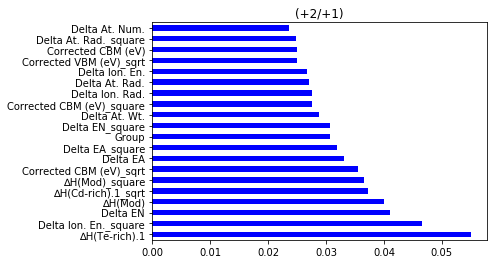

In [46]:
model.fit(X,y3)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', color = 'b', title = predictors[2])

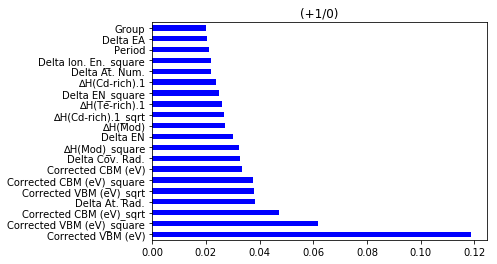

In [47]:
model.fit(X,y4)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', color = 'b', title = predictors[3])

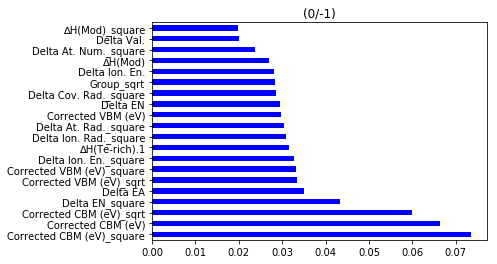

In [48]:
model.fit(X,y5)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', color = 'b', title = predictors[4])

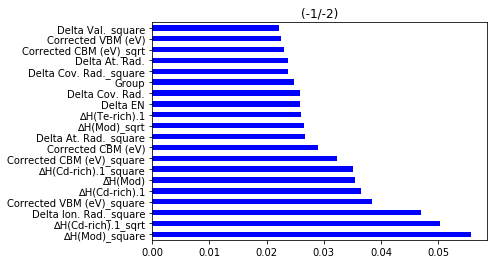

In [49]:
model.fit(X,y6)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', color = 'b', title = predictors[5])